In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('dataset_preprocessed2.csv')
df.tail(20)

,Unnamed: 0,Label,tweet,Tokenization,Stop_Removal,Tweet_Stemmed
129,129,Negatif,modal pencitraan selfi sana sini priode pertam...,"['modal', 'pencitraan', 'selfi', 'sana', 'sini...","['modal', 'pencitraan', 'selfi', 'priode', 'ga...","['modal', 'citra', 'selfi', 'priode', 'gagal',..."
130,130,Negatif,kebodohan yang harus segera diakhiri just say...,"['kebodohan', 'yang', 'harus', 'segera', 'diak...","['kebodohan', 'just', 'say', 'goodbyejokowi']","['bodoh', 'just', 'say', 'goodbyejokowi']"
131,131,Negatif,semenjak ada mereka indonesia tidak sedang bai...,"['semenjak', 'ada', 'mereka', 'indonesia', 'ti...","['semenjak', 'indonesia', 'goodbyejokowi', '']","['semenjak', 'indonesia', 'goodbyejokowi', '']"
132,132,Positif,semoga menjadi kenyataan biidznillah goo...,"['', 'semoga', 'menjadi', 'kenyataan', 'biidzn...","['', 'semoga', 'kenyataan', 'biidznillah', 'go...","['', 'moga', 'nyata', 'biidznillah', 'goodbyej..."
133,133,Netral,goodbyejokowi apa kabar,"['goodbyejokowi', 'apa', 'kabar']","['goodbyejokowi', 'kabar']","['goodbyejokowi', 'kabar']"
134,134,Negatif,sendok don adam kalau big data rahasia masak...,"['sendok', 'don', 'adam', 'kalau', 'big', 'dat...","['sendok', 'don', 'adam', 'big', 'data', 'raha...","['sendok', 'don', 'adam', 'big', 'data', 'raha..."
135,135,Netral,satu lagi alasan buat goodbyejokowi,"['satu', 'lagi', 'alasan', 'buat', 'goodbyejok...","['alasan', 'goodbyejokowi']","['alas', 'goodbyejokowi']"
136,136,Positif,goodbyejokowi goodbyejokowi keren neh tagar...,"['', 'goodbyejokowi', 'goodbyejokowi', 'keren'...","['', 'goodbyejokowi', 'goodbyejokowi', 'keren'...","['', 'goodbyejokowi', 'goodbyejokowi', 'keren'..."
137,137,Netral,lho kok ada tagar goodbyejokowi emangah ada ap...,"['lho', 'kok', 'ada', 'tagar', 'goodbyejokowi'...","['lho', 'tagar', 'goodbyejokowi', 'emangah', '...","['lho', 'tagar', 'goodbyejokowi', 'emangah', '..."
138,138,Netral,si titi karnataipan tag goodbyejokowi jogja ...,"['si', 'titi', 'karnataipan', 'tag', 'goodbyej...","['si', 'titi', 'karnataipan', 'tag', 'goodbyej...","['si', 'titi', 'karnataipan', 'tag', 'goodbyej..."


<AxesSubplot:>

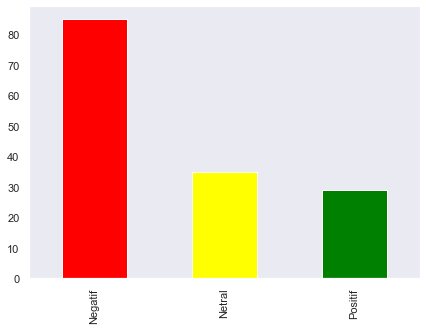

In [38]:
import seaborn as sns
colors = ['#FF0000', '#FFFF00', '#008000']
sns.set(style="dark")
df['Label'].value_counts().plot.bar(color = colors, figsize = (7, 5))

In [18]:
positive_words =' '.join([text for text in df['tweet'][total_data[sentiment] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('assets/positive_words.png')
plt.show()

NameError: name 'total_data' is not defined

In [3]:
def convert(polarity):
    if polarity == "Positif":
        return 1
    elif polarity == "Netral":
        return 0
    else:
        return -1

In [4]:
df['polarity'] = df['Label'].apply(convert)

In [5]:
x = df['Tweet_Stemmed']
y = df['polarity']

In [ ]:
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(df['isi'])

bow_transformer = CountVectorizer()
print(df['Tweet_Stemmed'].shape)
X = bow_transformer.fit_transform(df['Tweet_Stemmed'])

print(X.toarray())
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero Occurrences: ', X.nnz)

#TFIDF Transform
tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

In [7]:
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Density: 1.1970270470858912


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
print(X_test)

  (0, 77)	0.3333333333333333
  (0, 130)	0.3333333333333333
  (0, 184)	0.3333333333333333
  (0, 190)	0.3333333333333333
  (0, 234)	0.3333333333333333
  (0, 274)	0.3333333333333333
  (0, 348)	0.3333333333333333
  (0, 412)	0.3333333333333333
  (0, 548)	0.3333333333333333
  (1, 38)	0.3779644730092272
  (1, 76)	0.3779644730092272
  (1, 105)	0.3779644730092272
  (1, 184)	0.3779644730092272
  (1, 350)	0.3779644730092272
  (1, 360)	0.3779644730092272
  (1, 574)	0.3779644730092272
  (2, 13)	0.21320071635561041
  (2, 88)	0.21320071635561041
  (2, 109)	0.21320071635561041
  (2, 147)	0.21320071635561041
  (2, 171)	0.21320071635561041
  (2, 176)	0.42640143271122083
  (2, 184)	0.21320071635561041
  (2, 192)	0.21320071635561041
  (2, 298)	0.21320071635561041
  :	:
  (41, 315)	0.25
  (41, 339)	0.25
  (41, 351)	0.25
  (41, 353)	0.25
  (41, 467)	0.25
  (41, 581)	0.25
  (41, 616)	0.25
  (42, 184)	0.7071067811865475
  (42, 283)	0.35355339059327373
  (42, 383)	0.35355339059327373
  (42, 397)	0.353553390593

In [18]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [19]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.64      1.00      0.78        29
           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         8

    accuracy                           0.64        45
   macro avg       0.21      0.33      0.26        45
weighted avg       0.42      0.64      0.51        45



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
